# **Experiment 05 (Feature selection selection using RFECV)**

## **Name: Fahim Shahriar**
### Github: https://github.com/FahimS45

### Dataset description: https://archive.ics.uci.edu/dataset/2/adult
### Dataset link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score


# Ensure matplotlib inline plotting for Jupyter Notebooks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [114]:
# Load the dataset
data = pd.read_csv('adult.csv', na_values="?", skipinitialspace=True)

In [115]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [116]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [117]:
data.shape

(48842, 15)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [119]:
data.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [120]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [121]:
def null_percentage (df):

    df_len = df.shape[0]
    columns = df.columns
    total_null_count = 0

    for each in columns:
        null_count = df[each].isnull().sum()
        if null_count != 0.0:
            null_per = (df[each].isnull().sum() / df_len) * 100
            print(f'Null value percentage in {each} is : {null_per: .2f}')
            total_null_count = total_null_count + null_count
            
    if total_null_count == 0:
        print(f'No null value exist.')

In [122]:
null_percentage(data)

Null value percentage in workclass is :  5.73
Null value percentage in occupation is :  5.75
Null value percentage in native-country is :  1.75


In [123]:
def cat_cols(df):

    categorical_cols = df.select_dtypes(include=['object']).columns
    total_cat_cols = len(categorical_cols)
    total_cols = df.shape[1]

    if total_cat_cols != 0: 
        print(f'Total categorical column {total_cat_cols} out of {total_cols} and they are as follows: ')

        for each in categorical_cols:
            print(each)

        for each in categorical_cols:
            unique_vals = df[each].unique()
            print(f'Feature {each} has {len(unique_vals)} unique values which are: {unique_vals}\n')

In [124]:
cat_cols(data)

Total categorical column 9 out of 15 and they are as follows: 
workclass
education
marital-status
occupation
relationship
race
gender
native-country
income
Feature workclass has 9 unique values which are: ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature education has 16 unique values which are: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Feature marital-status has 7 unique values which are: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Feature occupation has 15 unique values which are: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed

### **Apply Label encoder**

In [125]:
df = data.copy()

label_encoder = LabelEncoder()

# Function to apply label encoding ignoring missing values
def label_encode_column(column):

    placeholder = 'missing'
    temp_col = column.fillna(placeholder)
    
    encoded_col = label_encoder.fit_transform(temp_col)
    
    encoded_col = pd.Series(encoded_col, index=column.index)
    encoded_col[column.isna()] = np.nan
    
    return encoded_col

for column in df.columns:
    df[column] = label_encode_column(df[column])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3.0,19329,1,6,4,6.0,3,2,1,0,0,39,38.0,0
1,21,3.0,4212,11,8,2,4.0,0,4,1,0,0,49,38.0,0
2,11,1.0,25340,7,11,2,10.0,0,4,1,0,0,39,38.0,1
3,27,3.0,11201,15,9,2,6.0,0,2,1,98,0,39,38.0,1
4,1,NaN,5411,15,9,4,NaN,3,4,0,0,0,29,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,3.0,21582,7,11,2,12.0,5,4,0,0,0,37,38.0,0
48838,23,3.0,10584,11,8,2,6.0,0,4,1,0,0,39,38.0,1
48839,41,3.0,10316,11,8,6,0.0,4,4,0,0,0,39,38.0,0
48840,5,3.0,16813,11,8,4,0.0,3,4,1,0,0,19,38.0,0


### **Data Visualization**

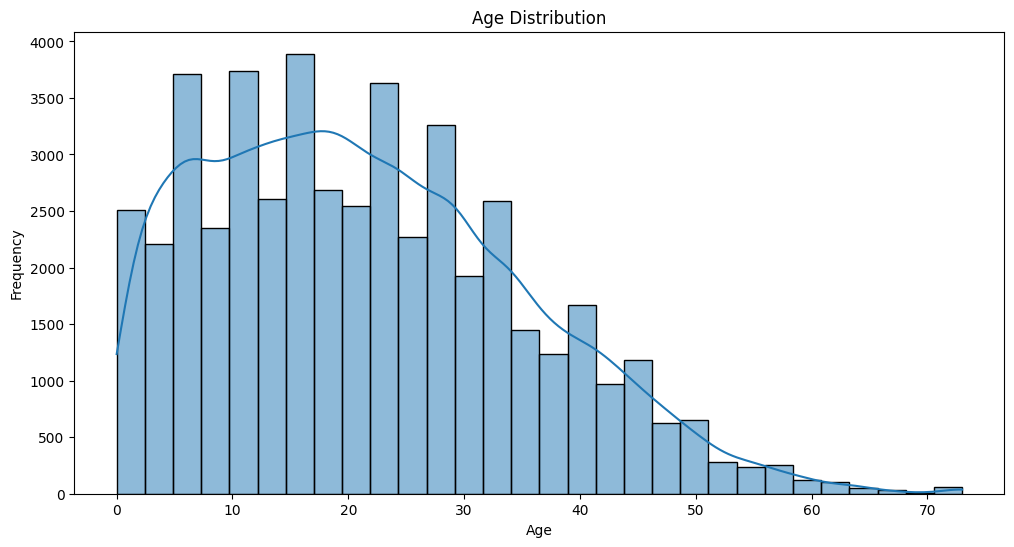

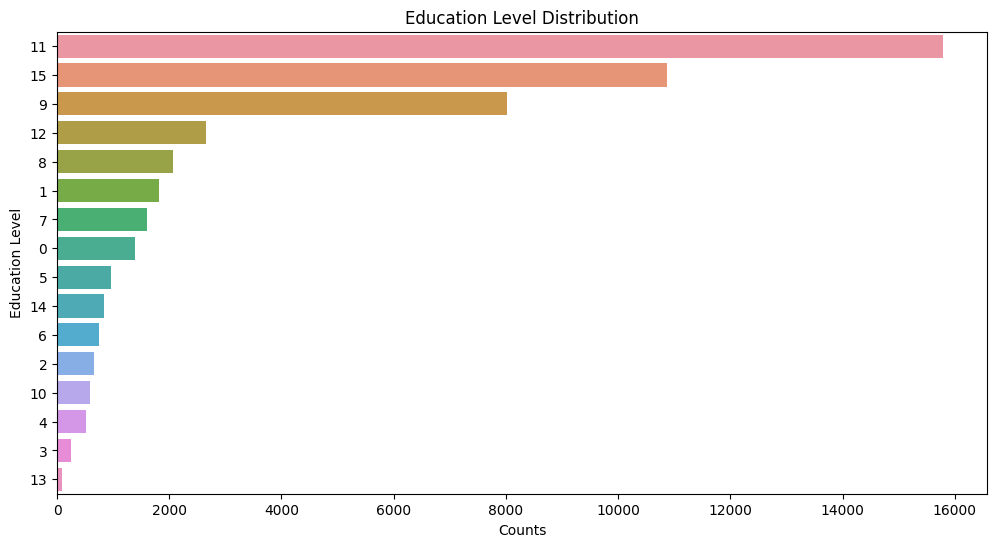

In [126]:
# Histogram for age
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for education level
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order = df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.show()


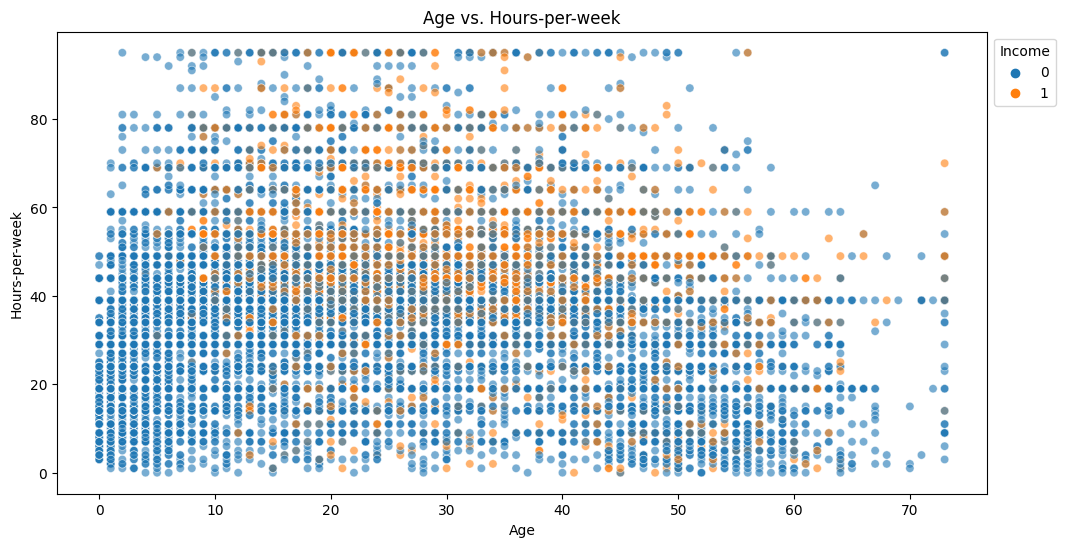

In [127]:
# Scatter plot for age vs hours-per-week
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, hue='income', alpha=0.6)

# Customize the legend
plt.legend(title='Income', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Age vs. Hours-per-week')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.show()

<Figure size 1200x600 with 0 Axes>

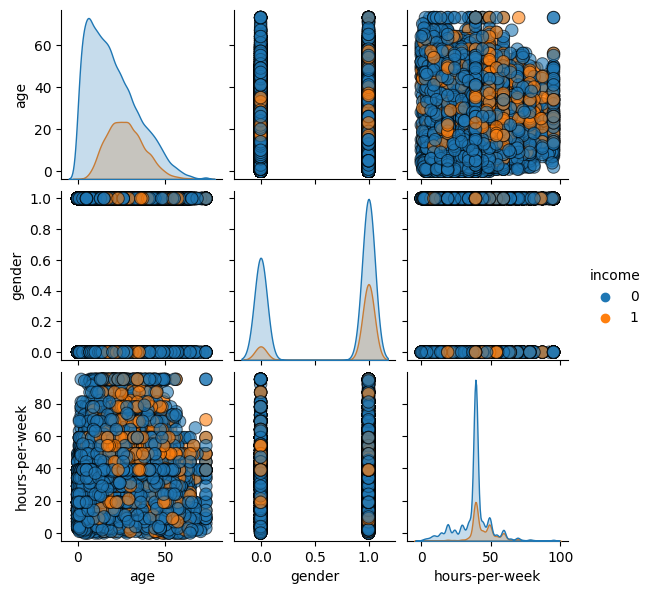

In [128]:
# Pairwise plot -> multi-variate
# Selecting a subset of features for clarity
subset_data = df[['age', 'gender', 'hours-per-week', 'income']]

# Pair plot
plt.figure(figsize=(12, 6))
sns.pairplot(subset_data, hue='income', diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, size=2)
plt.show()


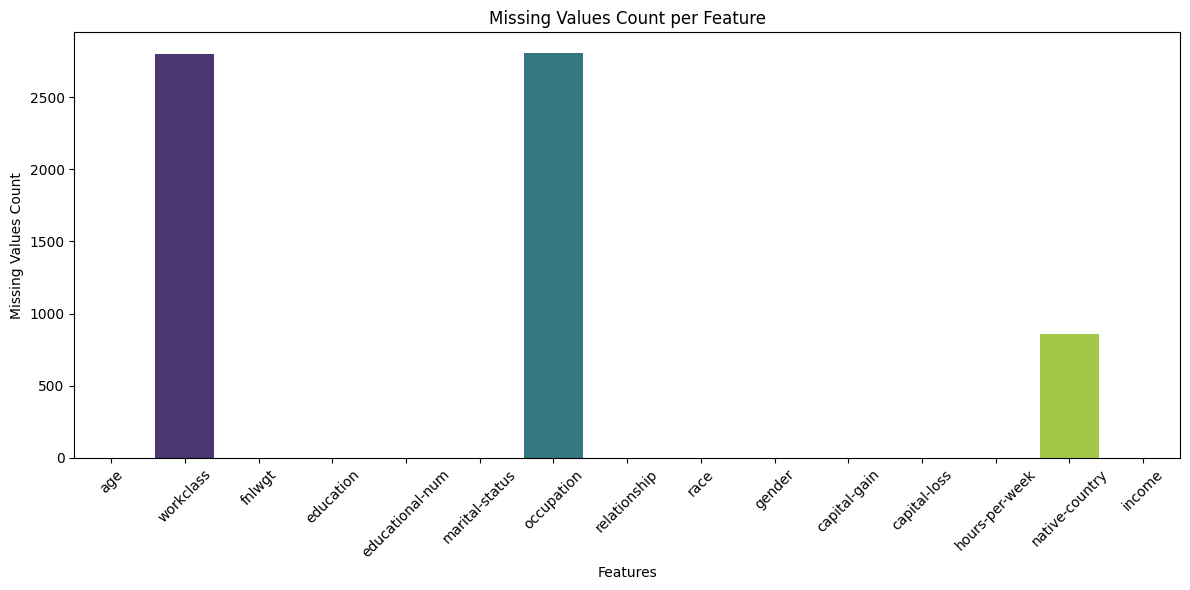

In [129]:
# Visualize null values in bar plot
def null_values_bar_plot(df):

    missing_values = df.isnull().sum()
    plt.figure(figsize=(12, 6))

    ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

    # Customize the plot
    plt.xlabel('Features')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Values Count per Feature')

    # Angle the x-axis tick labels
    plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better readability

    # Show the plot
    plt.tight_layout()
    plt.show()

null_values_bar_plot(df)


### **Train Test Split**

In [130]:
X = df.iloc[:, 0:14]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (34189, 14)
Shape of X_test: (14653, 14)
Shape of y_train: (34189,)
Shape of y_test: (14653,)


### **Feature Selection**
using null value percentage

<Axes: >

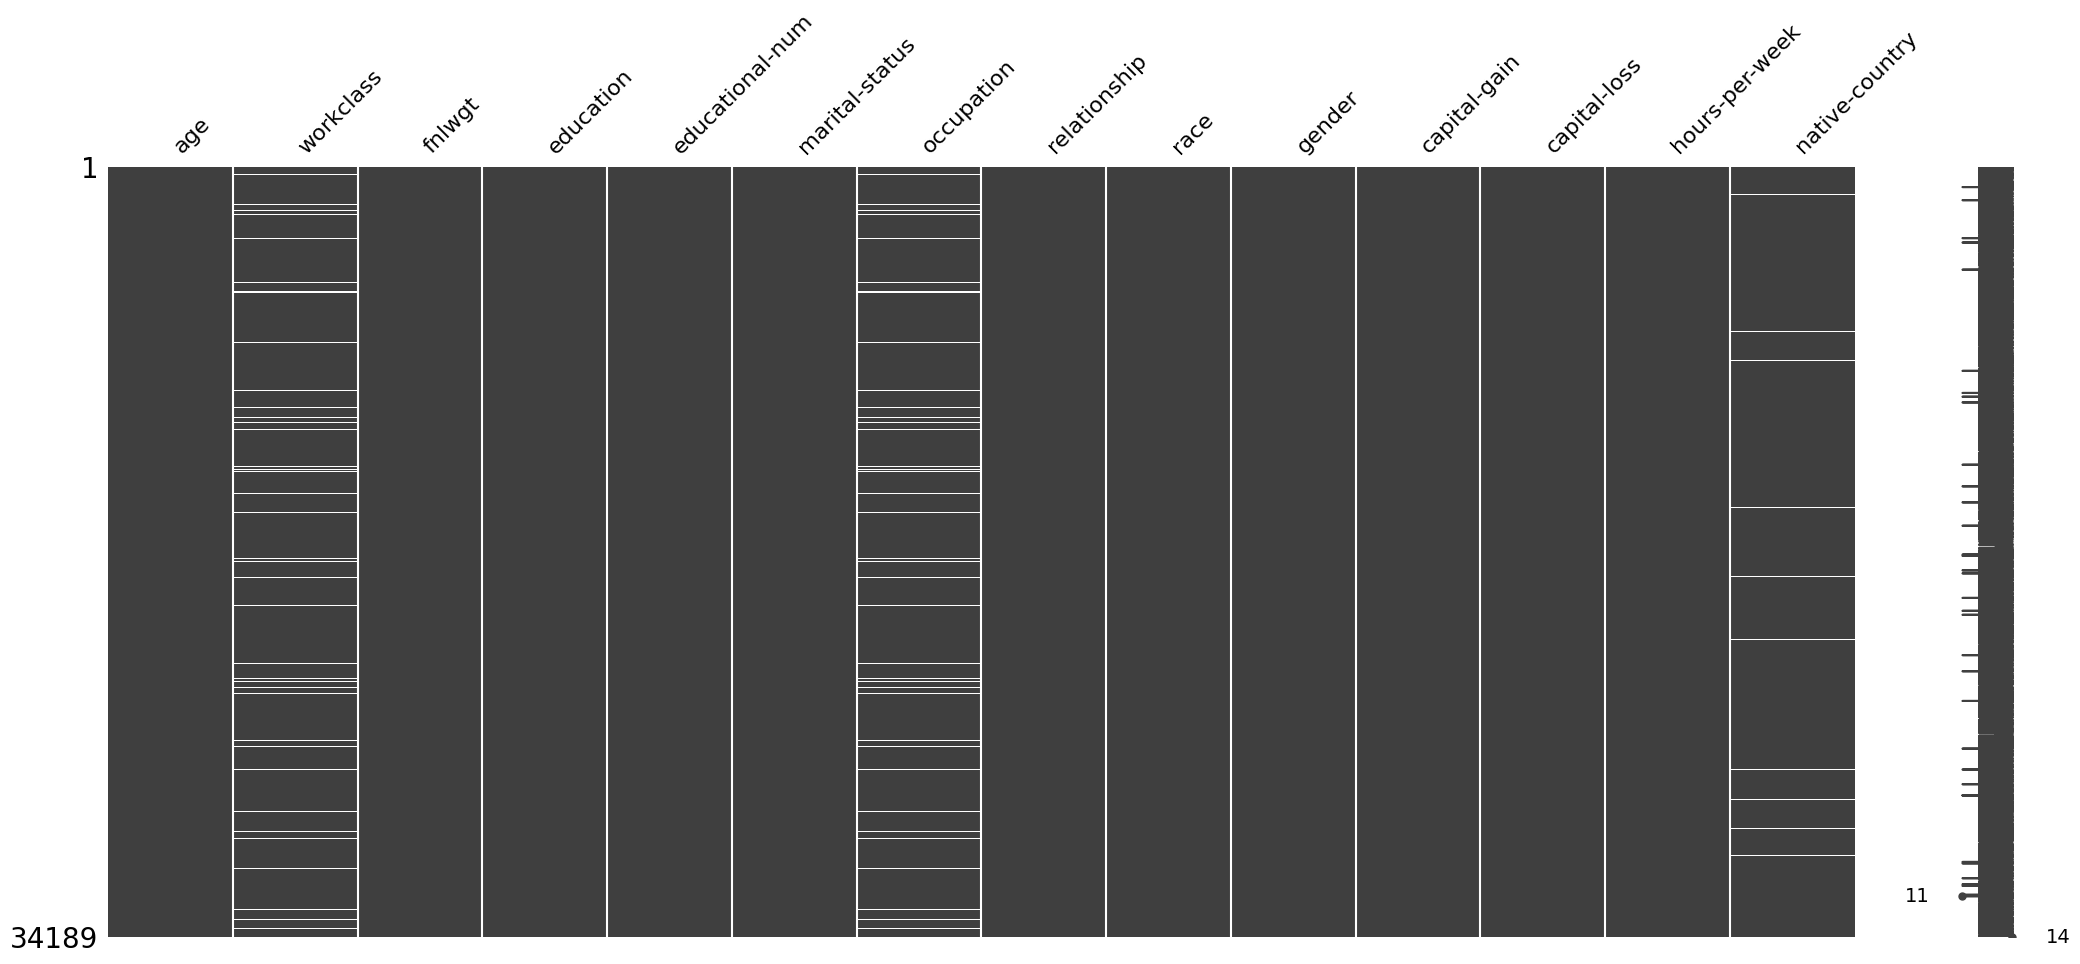

In [131]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(X_train)

In [132]:
# Dropping columns with less than 70% non-null values
def columns_dropping_using_null_values(df, threshold=5):
    
    percentage = threshold
    min_train = int(((percentage)/100)*df.shape[0])

    X_ = df.dropna(axis=1, thresh=min_train)
    dropped_columns = X_train.columns.difference(X_.columns)
    print(f"Dropped columns: {dropped_columns}")

    return X_


In [133]:
X_train = columns_dropping_using_null_values(X_train, 70)
X_train.shape

Dropped columns: Index([], dtype='object')


(34189, 14)

Dropping columns using pearson correlation

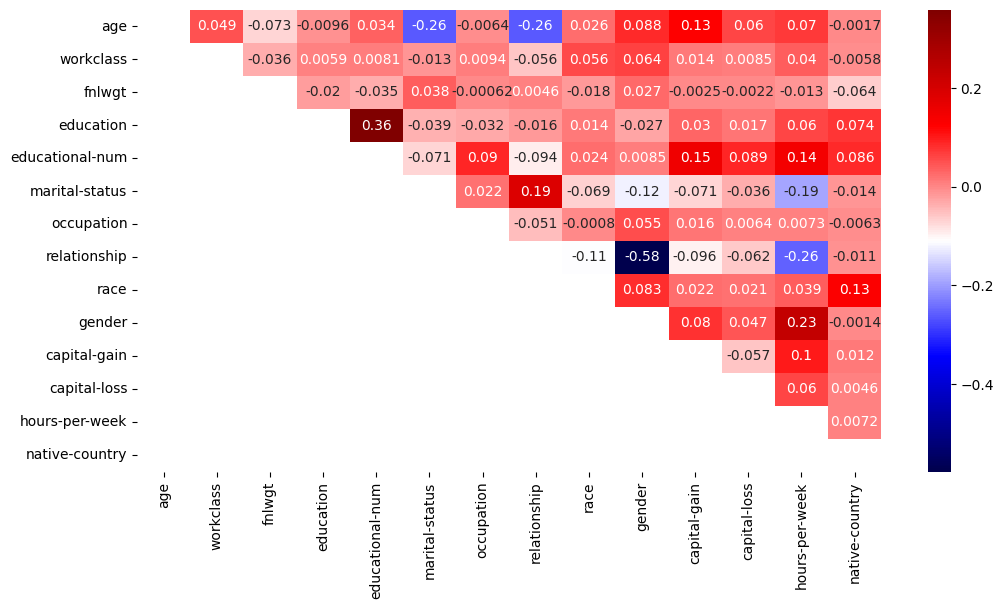

In [134]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

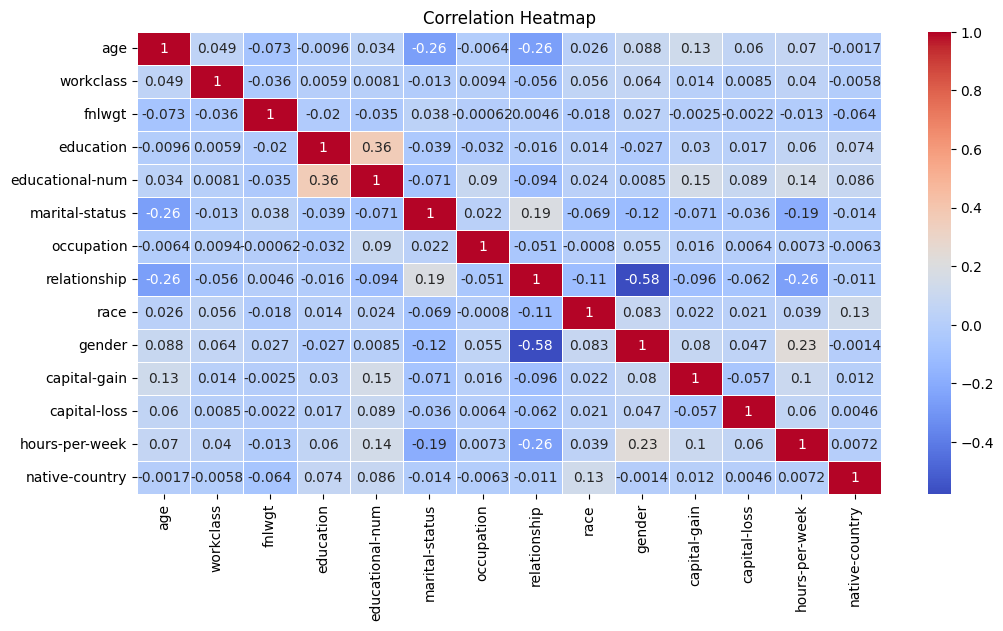

In [135]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [136]:
# Removing features that are highly correlated with another features with a threshold of >=80

def correlation(df, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [137]:
corr_features = correlation(X_train, 0.8) # Threshold as 80% 
print(len(corr_features))
print(corr_features)

0
set()


### **Imputing missing values with mean**

In [138]:
# Imputation with mean
imputer_ = SimpleImputer(strategy='mean')

X_train_imputed = imputer_.fit_transform(X_train)
X_test_imputed = imputer_.transform(X_test)

Now, let's use Recursive Feature Elimination through Cross Validation (RFECV) to select the most valuable features

In [139]:
from sklearn.feature_selection import RFECV

# Explore RFECV technique 
lr = LogisticRegression(solver='liblinear', random_state=42)

rfecv = RFECV(estimator=lr, min_features_to_select=5, step=1, cv=5)
rfecv.fit(X_train_imputed, y_train)

X_train_sub = rfecv.transform(X_train_imputed)

selected_features = df.columns[:-1][rfecv.support_]
print(f'Selected {len(selected_features)} features through RFECVare: {selected_features}')

Selected 10 features through RFECVare: Index(['age', 'workclass', 'educational-num', 'marital-status', 'relationship',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')


Later in this notebook we will do RFECV to obtain optimum number of features as part of our pipeline

### **Class Balancing**

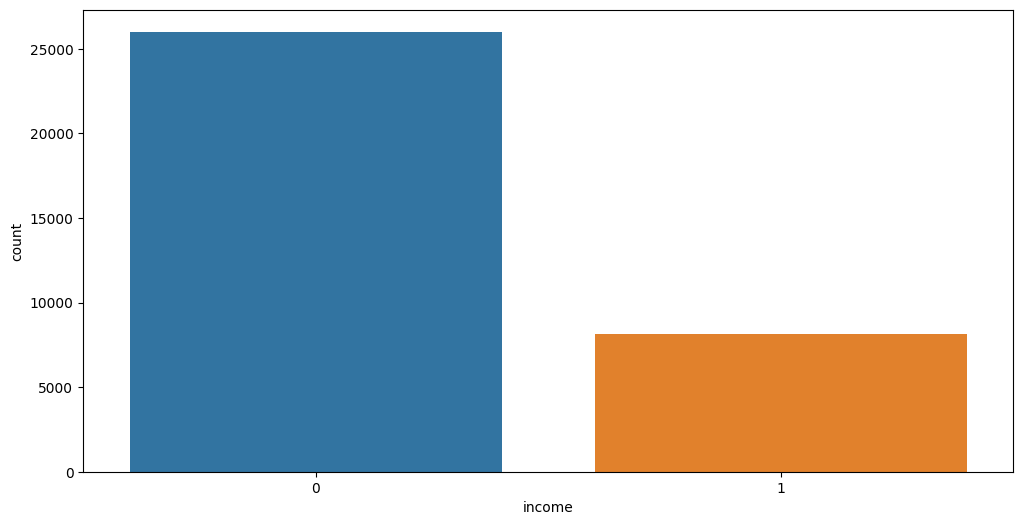

In [140]:
plt.figure(figsize = (12, 6))
sns.countplot(x = y_train)
plt.show()

In [141]:
print(f'Total samples in class 0: {np.sum(y_train == 0)}')
print(f'Total samples in class 1: {np.sum(y_train == 1)}')
avg = int(np.mean([np.sum(y_train == 0), np.sum(y_train == 1)]))
print(f'Mean of total samples in class 1 and class 0 is: {avg}')

Total samples in class 0: 26017
Total samples in class 1: 8172
Mean of total samples in class 1 and class 0 is: 17094


In [142]:
def smote_tomek_resample(X, y):
    # Calculate the average number of samples between the two classes
    target_samples = int(np.mean([np.sum(y == 0), np.sum(y == 1)]))
    
    # SMOTE to upsample the minority class
    smote = SMOTE(sampling_strategy={1: target_samples}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    # After upsampling
    plt.figure(figsize = (12, 6))
    plt.title('After upsampling')
    sns.countplot(x = y_res)
    plt.show()
    
    print(f'Total samples in class 0 (After upsampling): {np.sum(y_res == 0)}')
    print(f'Total samples in class 1 (After upsampling): {np.sum(y_res == 1)}')
    
    print('----------------------------------------------------------------------')

    # Tomek Links to clean the majority class
    tomek = TomekLinks(sampling_strategy='majority', n_jobs=-1)
    X_res_tom, y_res_tom = tomek.fit_resample(X_res, y_res)

    # Randomundersampling to match the desired target
    rand_under_samp = RandomUnderSampler(sampling_strategy={0: target_samples}, random_state=42)
    X_resampled, y_resampled = rand_under_samp.fit_resample(X_res_tom, y_res_tom)

    # After undersampling
    plt.figure(figsize = (12, 6))
    plt.title('After undersampling')
    sns.countplot(x = y_resampled)
    plt.show()

    print(f'Total samples in class 0 (After downsampling): {np.sum(y_resampled == 0)}')
    print(f'Total samples in class 1 (After downsampling): {np.sum(y_resampled == 1)}')
    
    return X_resampled, y_resampled

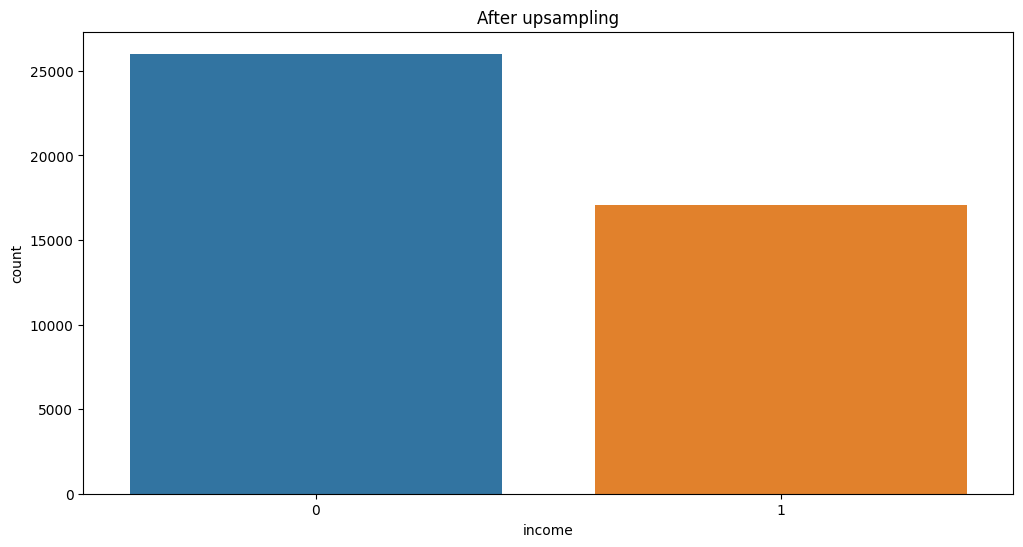

Total samples in class 0 (After upsampling): 26017
Total samples in class 1 (After upsampling): 17094
----------------------------------------------------------------------


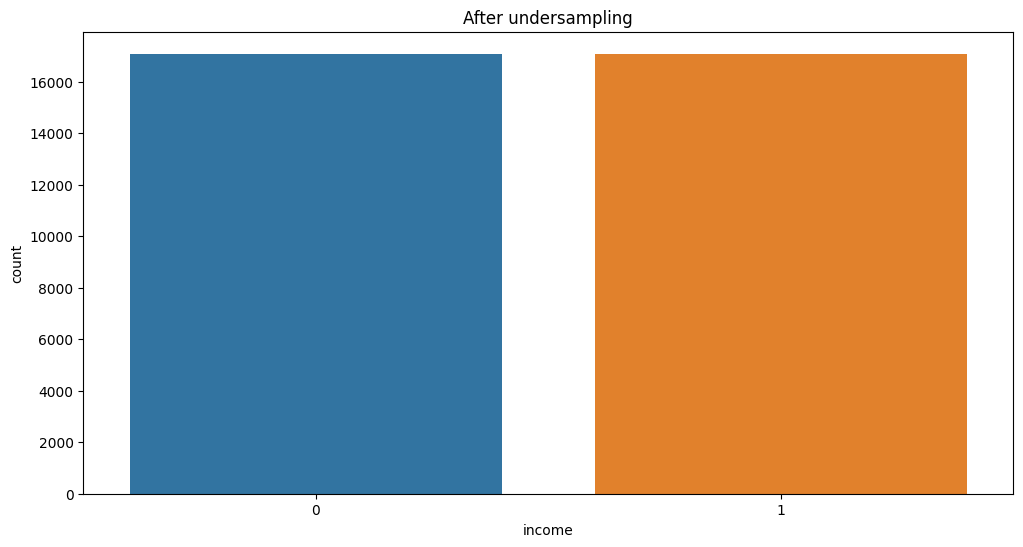

Total samples in class 0 (After downsampling): 17094
Total samples in class 1 (After downsampling): 17094


In [143]:
X_train_resampled, y_train_resampled = smote_tomek_resample(X_train_imputed, y_train)

### **Pipeline of all the models and operations**

In [144]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=LogisticRegression(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)), 
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Support Vector Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=LogisticRegression(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)), 
        ('classifier', SVC(random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=DecisionTreeClassifier(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=RandomForestClassifier(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),  
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=AdaBoostClassifier(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'GradientBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=GradientBoostingClassifier(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=XGBClassifier(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('classifier', XGBClassifier(random_state=42))
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=LGBMClassifier(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('classifier', LGBMClassifier(random_state=42))
    ]),
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=LogisticRegression(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('classifier', GaussianNB())
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=LogisticRegression(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('classifier', KNeighborsClassifier(n_neighbors=189))
    ]),
    'Bagging': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', RFECV(estimator=LogisticRegression(random_state=42), step=1, cv=5, min_features_to_select=1, scoring='accuracy', n_jobs=-1)),
        ('BaggingClassifier', BaggingClassifier(random_state=42))
    ])
}

In [145]:
from sklearn import set_config
set_config(display='diagram')
pipelines


{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('feature_selection',
                  RFECV(cv=5, estimator=LogisticRegression(random_state=42),
                        n_jobs=-1, scoring='accuracy')),
                 ('classifier', LogisticRegression(random_state=42))]),
 'Support Vector Classifier': Pipeline(steps=[('scaler', StandardScaler()),
                 ('feature_selection',
                  RFECV(cv=5, estimator=LogisticRegression(random_state=42),
                        n_jobs=-1, scoring='accuracy')),
                 ('classifier', SVC(random_state=42))]),
 'Decision Tree': Pipeline(steps=[('scaler', StandardScaler()),
                 ('feature_selection',
                  RFECV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                        n_jobs=-1, scoring='accuracy')),
                 ('classifier', DecisionTreeClassifier(random_state=42))]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler())

Selected 11 features through RFECV with Logistic Regression are: 
Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Logistic Regression Accuracy: 0.77

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.77      0.83     11138
           1       0.51      0.77      0.61      3515

    accuracy                           0.77     14653
   macro avg       0.71      0.77      0.72     14653
weighted avg       0.81      0.77      0.78     14653



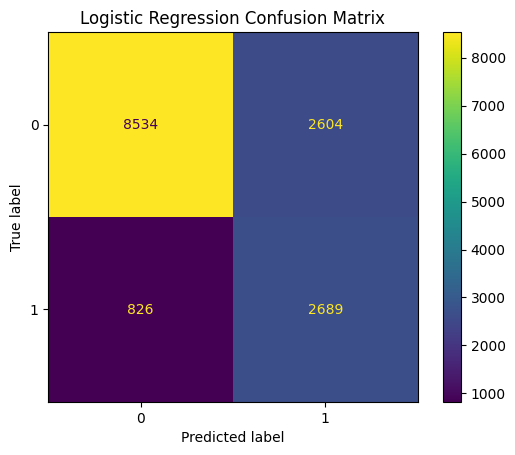

----------------------------------------------------------------------------
Selected 11 features through RFECV with Support Vector Classifier are: 
Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Support Vector Classifier Accuracy: 0.81

Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     11138
           1       0.57      0.83      0.68      3515

    accuracy                           0.81     14653
   macro avg       0.76      0.82      0.77     14653
weighted avg       0.85      0.81      0.82     14653



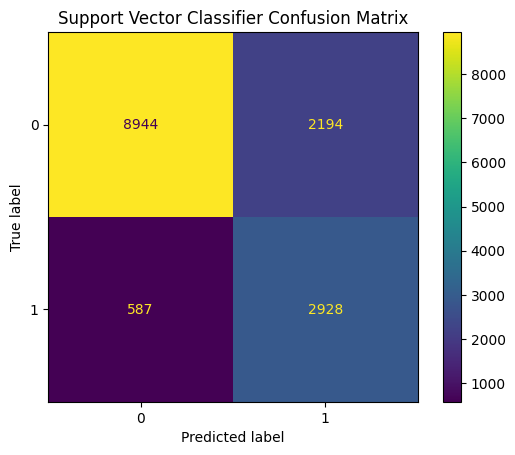

----------------------------------------------------------------------------
Selected 14 features through RFECV with Decision Tree are: 
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

Decision Tree Accuracy: 0.80

Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     11138
           1       0.56      0.70      0.62      3515

    accuracy                           0.80     14653
   macro avg       0.73      0.76      0.74     14653
weighted avg       0.82      0.80      0.80     14653



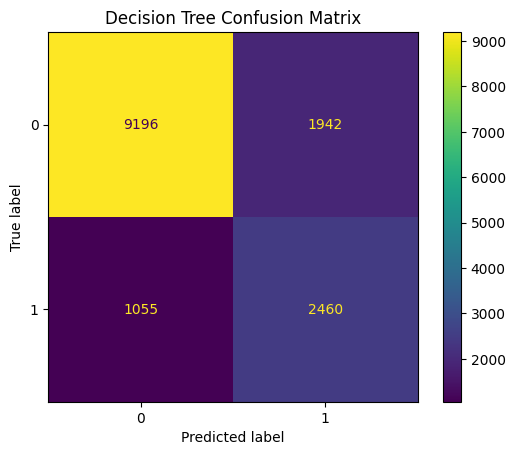

----------------------------------------------------------------------------
Selected 14 features through RFECV with Random Forest are: 
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

Random Forest Accuracy: 0.84

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     11138
           1       0.65      0.74      0.69      3515

    accuracy                           0.84     14653
   macro avg       0.78      0.81      0.79     14653
weighted avg       0.85      0.84      0.85     14653



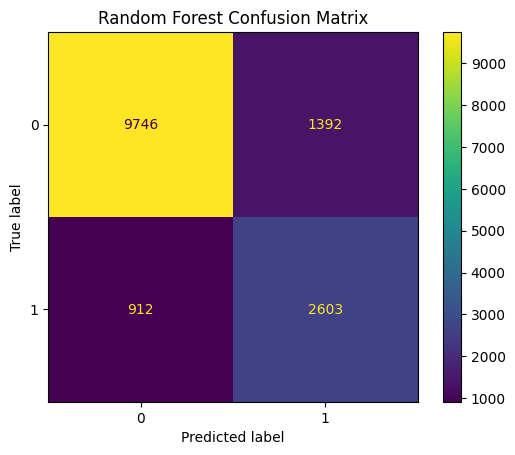

----------------------------------------------------------------------------
Selected 13 features through RFECV with AdaBoost are: 
Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

AdaBoost Accuracy: 0.82

AdaBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     11138
           1       0.60      0.78      0.68      3515

    accuracy                           0.82     14653
   macro avg       0.76      0.81      0.78     14653
weighted avg       0.85      0.82      0.83     14653



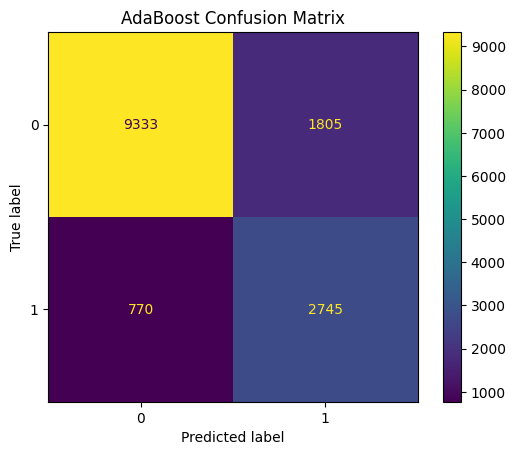

----------------------------------------------------------------------------
Selected 14 features through RFECV with GradientBoost are: 
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

GradientBoost Accuracy: 0.85

GradientBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     11138
           1       0.65      0.76      0.70      3515

    accuracy                           0.85     14653
   macro avg       0.79      0.82      0.80     14653
weighted avg       0.86      0.85      0.85     14653



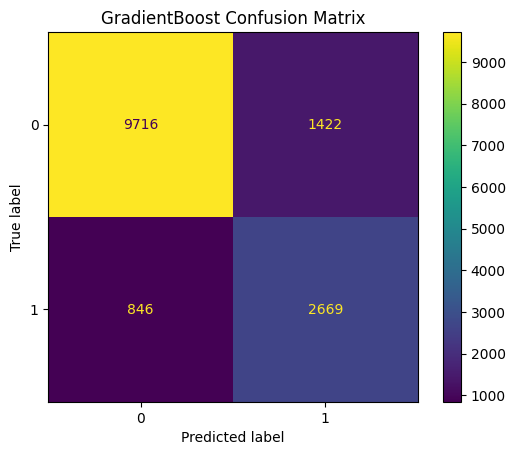

----------------------------------------------------------------------------
Selected 13 features through RFECV with XGBoost are: 
Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

XGBoost Accuracy: 0.86

XGBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11138
           1       0.68      0.77      0.72      3515

    accuracy                           0.86     14653
   macro avg       0.80      0.83      0.81     14653
weighted avg       0.86      0.86      0.86     14653



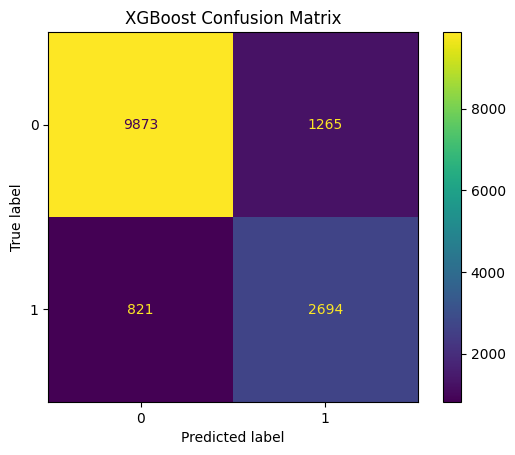

----------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 17094, number of negative: 17094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3384
[LightGBM] [Info] Number of data points in the train set: 34188, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 17094, number of negative: 17094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3152
[LightGBM] [Info] Number of data points in the train set: 34188, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> 

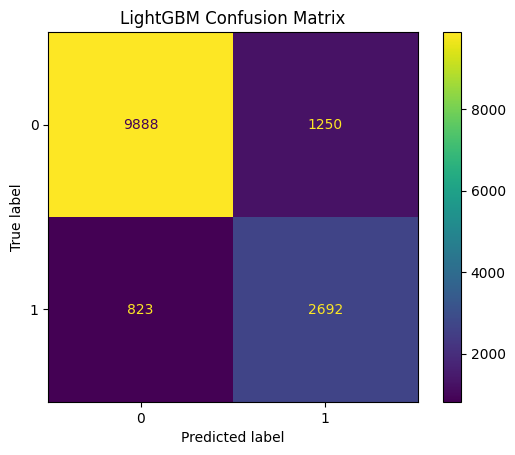

----------------------------------------------------------------------------
Selected 11 features through RFECV with Naive Bayes are: 
Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Naive Bayes Accuracy: 0.80

Naive Bayes Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     11138
           1       0.56      0.73      0.63      3515

    accuracy                           0.80     14653
   macro avg       0.73      0.77      0.75     14653
weighted avg       0.82      0.80      0.80     14653



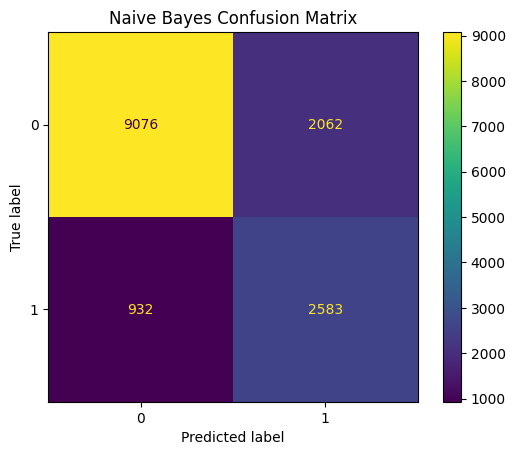

----------------------------------------------------------------------------
Selected 11 features through RFECV with KNN are: 
Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

KNN Accuracy: 0.79

KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11138
           1       0.54      0.83      0.66      3515

    accuracy                           0.79     14653
   macro avg       0.74      0.81      0.75     14653
weighted avg       0.84      0.79      0.80     14653



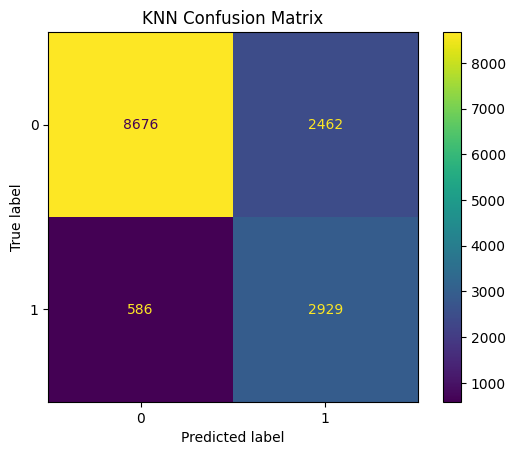

----------------------------------------------------------------------------
Selected 11 features through RFECV with Bagging are: 
Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Bagging Accuracy: 0.82

Bagging Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     11138
           1       0.61      0.68      0.65      3515

    accuracy                           0.82     14653
   macro avg       0.75      0.77      0.76     14653
weighted avg       0.83      0.82      0.82     14653



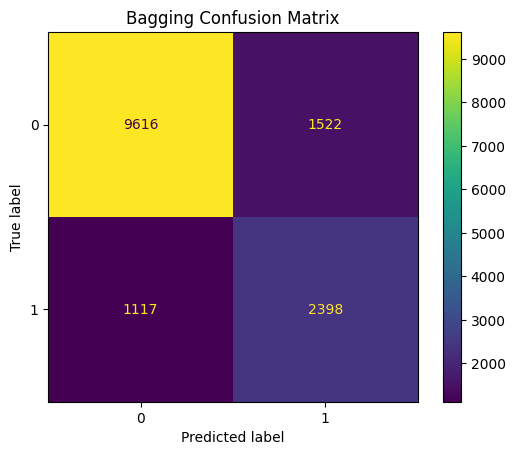

----------------------------------------------------------------------------


In [146]:
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

results = {metric: {} for metric in metrics}

for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_test_imputed)
    selected_features = df.columns[:-1][pipeline.named_steps['feature_selection'].support_]
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Selected {len(selected_features)} features through RFECV with {model_name} are: \n{selected_features}\n')
    print(f'{model_name} Accuracy: {accuracy:.2f}\n')
    print(f'{model_name} Classification Report: \n{classification_report(y_test, y_pred)}')

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    for metric_name, metric_func in metrics.items():
        results[metric_name][model_name] = metric_func(y_test, y_pred)

    print('----------------------------------------------------------------------------')

In [147]:
results_df = pd.DataFrame(results)
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.765918,0.814906,0.765918,0.779392
Support Vector Classifier,0.810210,0.850432,0.810210,0.820488
Decision Tree,0.795469,0.815944,0.795469,0.802685
Random Forest,0.842763,0.851373,0.842763,0.846056
AdaBoost,0.824268,0.846905,0.824268,0.831263
GradientBoost,0.845219,0.855734,0.845219,0.849026
XGBoost,0.857640,0.864996,0.857640,0.860421
LightGBM,0.858527,0.865529,0.858527,0.861195
Naive Bayes,0.795673,0.822725,0.795673,0.804361
KNN,0.791988,0.842357,0.791988,0.804332
